# Project 2 Final BIMM 143

# Background
The RPGRIP1 gene encodes for the X-linked retinitis pigmentosa GTPase regulator-interacting protein 1, which is a protein encoding a photoreceptor that is responsible for interacting with the retinitis pigmentosa GTPase regulator protein [7]. Mutations in this gene result in altered versions of the protein, including early stop codon, or lack of stop codons which cause faulty or non-functional isoforms of the protein [6]. Such mutations lead to autosomal recessive congenital blindness with diseases including Leber Congenital Amaurosis (LCA) and Retinitis Pigmentosa (RP) in humans [1]. Defects in this gene in other species also result in blindness, for example, by causing cone-rod dystrophy in canines [2]. 

Various studies have been done in humans, mice, and canines to look at the isoforms and pathways of RPGRIP1 in each and identify the mutations that result in disease. Some of the found mutations that resulted in such defects included truncation resulting in the protein's absence, point mutations in specific exons resulting in splice errors at their acceptor sites, and nonsense mutations in a highly conserved region resulting in premature stop codons [6].

Some databases where information about this gene and its protein sequence include, SWISS model, which had a visual crystal structure of the protein found in both humans and mice, NCBI, which has the nucleotide and amino acid sequences available for a variety of species and also some isoforms, and EMBL-EBI, which allowed for color-coded visualization of protein sequence alignments of all species.

## 1. Scientific question:
Does the RPGRIP1 gene in humans, which when mutated results in retinal dystrophy and congenital blindness, share similarities with the RPGRIP1 gene and protein sequences present in other mammalian species as determined by BLAST?


## 2: Scientific hypothesis:
If the RPGRIP1 gene sequence in humans shares similarities in sequence and structure with the RPGRIP1 gene in other mammalian species then the mutations that result in their descrease or loss of function must also have similarities.


# Part 1: Load Packages

In [45]:
# Blast is a package in biopython that allows for use of BLAST database using python code
# NCBIWWW allows access to the NCBI BLAST server in jupyter notebook
# NCBIXML allows code to work with the BLAST XML files
from Bio.Blast import NCBIWWW, NCBIXML 
#Bio.SeqIO provides a simple  interface to input and output sequence file formats such as multiple sequence alignments. 
from Bio import SeqIO
#Deals with files containing 1+ sequence alignments. Similar to seqIO, but uses sequence alignment files as Alignment objects not SeqRecord objects.
from Bio import AlignIO
from Bio import Seq
import os
#A package allowing for data manipulation and analysis
import pandas as pd
#Sequence Graph Transform (SGT) is a sequence embedding function. It extracts sequences and embeds them in a finite-dimensional space
import sgt
#NumPy is a library consisting of multidimensional array objects and a collection of methods for processing those arrays
import numpy as np
#Matplotlib is a  library for creating visualizations in Python
import matplotlib.pyplot as plt
#
import logomaker as lm

In [2]:
pip install sgt

Note: you may need to restart the kernel to use updated packages.


### Part 2: Load Data & Perform Bioinformatic Analysis (BLAST Search, Multiple Sequence Alignment, and Sequence Clustering)

In [33]:
#Input for BLAST
df = pd.read_csv('Various_Species_RPGRIP1_Seq.csv', header= None, names=["Species references","Sequence"])
#Test run for data
print(df)

                       Species references  \
0      ref|NC_000014.9|:21269397-21362000   
1      ref|NC_051819.1|:18564839-18657182   
2      ref|NC_000080.7|:52333132-52407360   
3       ref|NC_007135.7|:c7781861-7743202   
4        ref|NC_036893.1|:2210957-2284529   
5     ref|NC_037337.1|:c25870759-25797654   
6   ref|NC_030677.2|:c142117178-142088446   
7     ref|NC_010449.5|:c77917473-77800462   
8     ref|NC_060071.1|:c53645443-53589776   
9   ref|NW_025578520.1|:64468071-64520808   
10     ref|NW_025334033.1|:c455463-370676   
11      ref|NW_025578506.1|:845436-931246   
12     ref|NC_058373.1|:71944186-72059920   

                                             Sequence  
0   CCGCTCAGTCTTCGTCTCTTCACAAAATGGCCCCCGAGTCTCCTCT...  
1   TTTACTGCATTCTGTTTCTCCCACACTGAGTCTGTCCCCCAAGCTG...  
2   TACTGCAATCTTCTACAGAGCTGTGCATAAATCTTATATAGTATCA...  
3   AGTTTTGGGAAGAGCACAAAGATCGTTTCTCAGCAAGAATAAAAAT...  
4   GGAGACAGGGTTTCACCATGTTGGCCAGGCTGGTCTTGAACTCCTG...  
5   TTTTGTAATCAGAATAGTATTATTATATC

### BLAST Search:
    

In [79]:
from Bio import Seq
from Bio.Blast import NCBIWWW, NCBIXML 
from Bio import SeqIO

sequence_data = open("Human_BLAST_Seq.fasta").read()

seq_record = next(SeqIO.parse(open("Human_BLAST_Seq.fasta"),'fasta'))
#from Bio import Medline
#with open("Various_Species_RPGRIP1_Seq.txt") as seq_record:
     #for record in Medline.parse(seq_record):
results = NCBIWWW.qblast("blastn", "nt", seq_record.seq) 

#print(results)
with open('Human_BLAST_Seq.fasta', 'w') as save_file: 
    blast_results = results.read() 
    save_file.write(blast_results)
E_VALUE_THRESH = 1e-20 
for record in NCBIXML.parse(open('Human_BLAST_Seq.fasta')): 
     if record.alignments: 
        print("\n") 
        print("query: %s" % record.query[:100]) 
        for align in record.alignments: 
           for hsp in align.hsps: 
              if hsp.expect < E_VALUE_THRESH: 
                 print("match: %s " % align.title[:100])



query: No definition line
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517 
match: gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|C

### Multiple Sequence Alignment 

In [12]:
#Input for MS Alignment
input_file = 'Various_Species_RPGRIP1_Seq.fasta'
records = SeqIO.parse(input_file, 'fasta')
records = list(records) # make a copy, otherwise our generator
                        # is exhausted after calculating maxlen
maxlen = max(len(record.seq) for record in records)

# pad sequences so that they all have the same length
for record in records:
    if len(record.seq) != maxlen:
        sequence = str(record.seq).ljust(maxlen, '.')
        record.seq = Seq.Seq(sequence)
assert all(len(record.seq) == maxlen for record in records)

# write to temporary file and do alignment
output_file = '{}_padded.fasta'.format(os.path.splitext(input_file)[0])
with open(output_file, 'w') as f:
    SeqIO.write(records, f, 'fasta')
alignment = AlignIO.read(output_file, "fasta")
print (alignment)


Alignment with 13 rows and 117012 columns
CCGCTCAGTCTTCGTCTCTTCACAAAATGGCCCCCGAGTCTCCT...... ref|NC_000014.9|:21269397-21362000
TTTACTGCATTCTGTTTCTCCCACACTGAGTCTGTCCCCCAAGC...... ref|NC_051819.1|:18564839-18657182
TACTGCAATCTTCTACAGAGCTGTGCATAAATCTTATATAGTAT...... ref|NC_000080.7|:52333132-52407360
AGTTTTGGGAAGAGCACAAAGATCGTTTCTCAGCAAGAATAAAA...... ref|NC_007135.7|:c7781861-7743202
GGAGACAGGGTTTCACCATGTTGGCCAGGCTGGTCTTGAACTCC...... ref|NC_036893.1|:2210957-2284529
TTTTGTAATCAGAATAGTATTATTATATCTCCAACTTCTTGATG...... ref|NC_037337.1|:c25870759-25797654
ATTCACTAAAATCAGTAAAAGGAACAACATGCGCTAGTCTGGGG...... ref|NC_030677.2|:c142117178-142088446
TGGTCTCTGATGGATCCAGACAAAGCACTTAAAACTTCACAAAA...TGG ref|NC_010449.5|:c77917473-77800462
AGTTCTAAACCCCTGTAAGAGCAGTTTCTATTTCTTCTTTTTTG...... ref|NC_060071.1|:c53645443-53589776
AAAAGTATATCTTAGCAACATTATGGCTATTTCATTTTTTCCAA...... ref|NW_025578520.1|:64468071-64520808
TCCTAATTATTTTTCTTCCCGTGGTTAAAAATCTTTTCTTATTT...... ref|NW_025334033.1|:c455463-370676
TACGAT

### Sequence Clustering:

0.8972653510497838


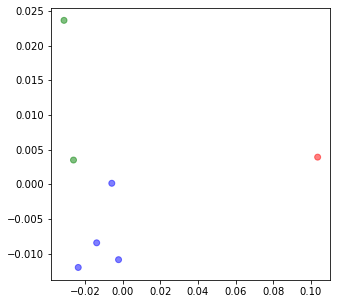

In [85]:
#DataFrame used to create two-dimensional, size-mutable, potentially heterogeneous tabular data.
protein_data = pd.read_csv('Species_Seq_Cluster.csv', header=None, names=["Species", "Sequence"])
#print(protein_data.columns)
#pd.DataFrame.to_csv('Various_Species_RPGRIP1_Seq.csv')
#pd.DataFrame(protein_data, dtype=None, columns=None)
X = protein_data['Sequence']
def split(word): 
    return [char for char in word]
sequences = [split(x) for x in X]
#print(sequences[0])
import sgt
from sgt import SGT
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
#SGT = StandardScaler()
sgt = SGT(kappa = 10, lengthsensitive = False)
#corpus = pd.DataFrame(/Users/ali/Downloads/RPGRIP1_datasets/Various_Species_RPGRIP1_Seq.csv, columns=['Ref', 'sequence'])
corpus=pd.DataFrame([[i, s] for i,s in enumerate(sequences)], columns=['id', 'sequence'])
embedding = sgt.fit_transform(corpus=corpus)
embedding = embedding.set_index('id')
pca = PCA(n_components=2)
pca.fit(embedding)
X = pca.transform(embedding)
print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
#df.head()
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

### Sequence Logos

In [14]:
!pip install logomaker

In [ ]:
#Test run logomaker to see an example of a sequence logo
#lm.demo()

>NP_001300702.1
LTRLLDLKSHRIRQLEEQLKDVVY
>XP_020955717.1
LNQLLDLKNKRINQLEGILRSLGLP
>NP_065099.3
LTRLLDLKNNRIKQLEGILRSHDLP
>XP_006519752.1
LNHLLDFKNSRIKQLEEQLKDVAY
>NP_851377.1
LNQLLDLKNKRINQLEEQLKDVAY

['LTRLLDLKSHRIRQLEEQLKDVVY', 'LNQLLDLKNKRINQLEGILRSLGLP', 'LTRLLDLKNNRIKQLEGILRSHDLP', 'LNHLLDFKNSRIKQLEEQLKDVAY', 'LNQLLDLKNKRINQLEEQLKDVAY']


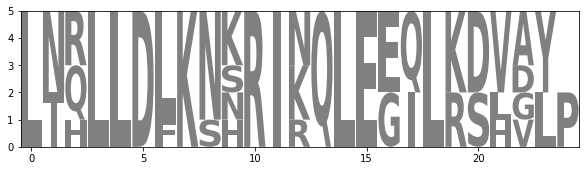

In [75]:
#For multiple sequence alignment with gaps
%matplotlib inline
plt.ion()
#Allows for creation of sequence logos and visualization from alignments to show conservation of AAs in sequences.
with open('Proteins_Seq_Logos.fasta') as f:
          
    lines = f.readlines()
# preview loaded file
print(''.join(lines[:20]))


# extract ww domain sequences
seqs = [seq.strip().upper() for seq in lines if ('#' not in seq) and ('>') not in seq]

#Preview sequences
#print('There are %d sequences, all of length %d'%(len(seqs), len(seqs[0])))
print(seqs[:5])
for i, s in enumerate(seqs):
    if len(s) < 25:
        seqs[i] = s + "." 
        
#print(len(s))
counts_mat = lm.alignment_to_matrix(seqs)
counts_mat.head()
lm.Logo(counts_mat)



## Pymol Videos: 
#### Visualization of 4 Species' Proteins

Homo Sapiens(human) RPGRIP1: https://youtu.be/pApDVsZQIwU

Felis Catus(cat) RPGRIP1: https://youtu.be/x8TqqCugWMg

Sus Scrofa(pig) RPGRIP1: https://youtu.be/j_gFT1ToVgw

Bos Taurus(cattle)RPGRIP1: https://youtu.be/HnBICwmq-HQ

## Analysis

As seen in the sequence logo, it can be seen that some parts, leucines in particular, are very highly conserved in the sequences of Canis lupus familiaris (dog), Sus scrofa (pig), Homo sapiens (human), Mus musculus (mouse), and Bos taurus (cattle) respectively. From my research into the mutations that cause a malfunction or loss of function of this gene, I found that many times mutations and defects in highly conserved regions play a large role in the cause of ths diseases previously discussed. This small snippet of a vital part of the protein that shows some highly conserved areas demonstrates how these mutations could affect and cause similar degeneration across multiple species. Similarly, looking closely at the multiple sequence alignments, which I also viewed in a color-coded formart in MView (html of results can be found in github files), I was able to see a similar pattern. Overall the protein sequence was highly conserved between species apart from several gaps and spaces in some amino acid sequences. This would further support my hypothesis that similar mutations between species would cause defects in the protein. Finally, it can be seen in the pymol videos how similar the protein structures are for the four species, Homo sapiens (human), Felis catus (domestic cat), Sus scrofa (pig), and Bos taurus (cattle), respectively. Each of the four structures share the same three alpha helix attached to six beta barrel-like structure. Another key feature is amino acid chain that is seen sticking out of the sequence which is present in all of these proteins. The Homo sapiens structure is slightly more complex than the other mammalian structures, however it still exibits all of the key structures and is folded in a similar manner. However, for the sequence clustering I looked for regions in the proteins that were vastly different and used those to compare the variance of the sequences to each other. I found that the proteins varied the most at the beginning of their sequences and wanted to further compare these. As you can see, there are species that are more similar to one another (in blue) and those that have greater variance in this region (green and red). This shows that while there are some highly conserved regions in most of the sequence, there are also some vastly variable areas where mutations may impact these proteins also. 

## Sources:
[1] Zou, Gang et al. “Noncoding mutation in RPGRIP1 contributes to inherited retinal degenerations.” Molecular vision vol. 27 95-106. 18 Mar. 2021 https://pubmed.ncbi.nlm.nih.gov/33907365/

[2] Miyadera, Keiko et al. “Multiple mechanisms contribute to leakiness of a frameshift mutation in canine cone-rod dystrophy.” PloS one vol. 7,12 (2012): e51598. doi:10.1371/journal.pone.0051598. https://pubmed.ncbi.nlm.nih.gov/23251588/ 

[3] Das, Rueben G et al. “Variabilities in retinal function and structure in a canine model of cone-rod dystrophy associated with RPGRIP1 support multigenic etiology.” Scientific reports vol. 7,1 12823. 9 Oct. 2017, doi:10.1038/s41598-017-13112-w. https://pubmed.ncbi.nlm.nih.gov/28993665/ 

[4] Kuznetsova, Tatyana et al. “Structural organization and expression pattern of the canine RPGRIP1 isoforms in retinal tissue.” Investigative ophthalmology & visual science vol. 52,6 2989-98. 6 May. 2011, doi:10.1167/iovs.10-6094. https://pubmed.ncbi.nlm.nih.gov/21282582/ 

[5] Miyadera, Keiko et al. “Genome-wide association study in RPGRIP1(-/-) dogs identifies a modifier locus that determines the onset of retinal degeneration.” Mammalian genome : official journal of the International Mammalian Genome Society vol. 23,1-2 (2012): 212-23. doi:10.1007/s00335-011-9384-9. https://pubmed.ncbi.nlm.nih.gov/22193413/ 

[6]Huang, Hui et al. “Targeted next-generation sequencing identified novel mutations in RPGRIP1 associated with both retinitis pigmentosa and Leber's congenital amaurosis in unrelated Chinese patients.” Oncotarget vol. 8,21 (2017): 35176-35183. doi:10.18632/oncotarget.17052. https://pubmed.ncbi.nlm.nih.gov/28456785/ 

[7] https://en.wikipedia.org/wiki/RPGRIP1

[8) https://towardsdatascience.com/sequence-embedding-for-clustering-and-classification-f816a66373fb 

[9]https://www.tutorialspoint.com/biopython/biopython_overview_of_blast.htm 

[10]https://biopython.org/wiki/AlignIO 

[11] https://github.com/jbkinney/logomaker/blob/master/logomaker/tutorials/2_logos_from_alignment.ipynb